In [52]:
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.iforest import IForest
from pyod.models.pca import PCA
from pyod.models.abod import ABOD
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.xgbod import XGBOD
from pyod.models.lunar import LUNAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.font_manager
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from scipy import stats

In [53]:
alldata = pd.read_csv('classification_data_ts_truthing_subset.csv')
# Drop rows with missing values in HMTruth
alldata = alldata.dropna(subset=['HMTruth'])

In [54]:
# Add columns for each of the outlier detection methods
alldata['LOF'] = None
alldata['KNN'] = None
alldata['MCD'] = None
alldata['IForest'] = None
alldata['PCA'] = None
alldata['ABOD'] = None
alldata['FB'] = None
alldata['XGBOD'] = None
alldata['LUNAR'] = None
alldata['LOF_scores'] = None
alldata['KNN_scores'] = None
alldata['MCD_scores'] = None
alldata['IForest_scores'] = None
alldata['PCA_scores'] = None
alldata['ABOD_scores'] = None
alldata['FB_scores'] = None
alldata['XGBOD_scores'] = None
alldata['LUNAR_scores'] = None

In [58]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
# Iterate through datasets by RepID, apply various outlier detection methods using pyod, and save results to a new dataframe
rep_ids = alldata['RepID'].unique()
for rep_id in rep_ids:
    flux = alldata[alldata['RepID'] == rep_id][['N2OFlux']]
    true = alldata[alldata['RepID'] == rep_id][['HMTruth']]
    # Add column to flux dataframe counting upward from 0
    flux['index'] = np.arange(len(flux))

    # MCD
    mcd = MCD(contamination=0.25)
    mcd.fit(flux)
    mcd_pred = mcd.predict(flux)
    mcd_scores = mcd.decision_scores_
    '''
    # LOF
    lof = LOF(contamination=0.25)
    lof.fit(flux)
    lof_pred = lof.predict(flux)
    lof_scores = lof.decision_scores_

    # KNN
    knn = KNN(contamination=0.25)
    knn.fit(flux)
    knn_pred = knn.predict(flux)
    knn_scores = knn.decision_scores_

    # IForest
    iforest = IForest(contamination=0.25)
    iforest.fit(flux)
    iforest_pred = iforest.predict(flux)
    iforest_scores = iforest.decision_scores_

    # PCA
    pca = PCA(contamination=0.25)
    pca.fit(flux)
    pca_pred = pca.predict(flux)
    pca_scores = pca.decision_scores_

    # ABOD
    abod = ABOD(contamination=0.25)
    abod.fit(flux)
    abod_pred = abod.predict(flux)
    abod_scores = abod.decision_scores_


    # FeatureBagging
    fb = FeatureBagging(contamination=0.25, n_jobs=-1)
    fb.fit(flux)
    fb_pred = fb.predict(flux)
    fb_scores = fb.decision_scores_

    # XGBOD
    xgbod = XGBOD()
    xgbod.fit(flux, true)
    xgbod_pred = xgbod.predict(flux)
    xgbod_scores = xgbod.decision_scores_

    # LUNAR
    lunar = LUNAR()
    lunar.fit(flux)
    lunar_pred = lunar.predict(flux)
    lunar_scores = lunar.decision_scores_
    '''
    # Add results lists to dataframe
    alldata.loc[alldata['RepID'] == rep_id, 'MCD'] = mcd_pred
    #alldata.loc[alldata['RepID'] == rep_id, 'LOF'] = lof_pred
    #alldata.loc[alldata['RepID'] == rep_id, 'KNN'] = knn_pred
    #alldata.loc[alldata['RepID'] == rep_id, 'IForest'] = iforest_pred
    #alldata.loc[alldata['RepID'] == rep_id, 'PCA'] = pca_pred
    #alldata.loc[alldata['RepID'] == rep_id, 'ABOD'] = abod_pred
    #alldata.loc[alldata['RepID'] == rep_id, 'LOF_scores'] = lof_scores
    #alldata.loc[alldata['RepID'] == rep_id, 'KNN_scores'] = knn_scores
    alldata.loc[alldata['RepID'] == rep_id, 'MCD_scores'] = mcd_scores
    #alldata.loc[alldata['RepID'] == rep_id, 'IForest_scores'] = iforest_scores
    #alldata.loc[alldata['RepID'] == rep_id, 'PCA_scores'] = pca_scores
    #alldata.loc[alldata['RepID'] == rep_id, 'ABOD_scores'] = abod_scores
    #alldata.loc[alldata['RepID'] == rep_id, 'FB_scores'] = fb_scores
    #alldata.loc[alldata['RepID'] == rep_id, 'XGBOD_scores'] = xgbod_scores
    #alldata.loc[alldata['RepID'] == rep_id, 'LUNAR_scores'] = lunar_scores

    # Get the interquartile range
    q75, q25 = np.percentile(flux['N2OFlux'], [75 ,25])
    iqr = q75 - q25
    halfiqr = iqr/2
    median = np.median(flux['N2OFlux'])
    threshold = median + halfiqr

    # Where RepID = rep_id and N2OFlux <= median, set each of the outlier detection methods to 0
    alldata.loc[(alldata['RepID'] == rep_id) & (alldata['N2OFlux'] <= threshold), 'MCD'] = 0
    #alldata.loc[(alldata['RepID'] == rep_id) & (alldata['N2OFlux'] <= median), 'LOF'] = 0
    #alldata.loc[(alldata['RepID'] == rep_id) & (alldata['N2OFlux'] <= median), 'KNN'] = 0
    #alldata.loc[(alldata['RepID'] == rep_id) & (alldata['N2OFlux'] <= median), 'IForest'] = 0
    #alldata.loc[(alldata['RepID'] == rep_id) & (alldata['N2OFlux'] <= median), 'PCA'] = 0
    #alldata.loc[(alldata['RepID'] == rep_id) & (alldata['N2OFlux'] <= median), 'ABOD'] = 0
    #alldata.loc[(alldata['RepID'] == rep_id) & (alldata['N2OFlux'] <= median), 'FB'] = 0
    #alldata.loc[(alldata['RepID'] == rep_id) & (alldata['N2OFlux'] <= median), 'XGBOD'] = 0
    #alldata.loc[(alldata['RepID'] == rep_id) & (alldata['N2OFlux'] <= median), 'LUNAR'] = 0
# Save all data to csv
alldata.to_csv('outlier_detection.csv', index=False)

In [2]:
# Read outlier_detection.csv
alldata = pd.read_csv('outlier_detection.csv')

In [59]:
true = alldata['HMTruth'].values.tolist()
iqrhm = alldata['IQRHM'].values.tolist()
#lof_pred = alldata['LOF'].values.tolist()
#knn_pred = alldata['KNN'].values.tolist()
mcd_pred = alldata['MCD'].values.tolist()
'''
iforest_pred = alldata['IForest'].values.tolist()
pca_pred = alldata['PCA'].values.tolist()
abod_pred = alldata['ABOD'].values.tolist()
fb_pred = alldata['FB'].values.tolist()
xgbod_pred = alldata['XGBOD'].values.tolist()
lunar_pred = alldata['LUNAR'].values.tolist()
'''
# Print the accuracy of list lof_pred to list true
print("1.5 IQRHM Accuracy:", sum(1 for x,y in zip(iqrhm,true) if x == y) / len(true))
#print("LOF Accuracy:", sum(1 for x,y in zip(lof_pred,true) if x == y) / len(true))
#print("KNN Accuracy:", sum(1 for x,y in zip(knn_pred,true) if x == y) / len(true))
print("MCD Accuracy:", sum(1 for x,y in zip(mcd_pred,true) if x == y) / len(true))
#print("IForest Accuracy:", sum(1 for x,y in zip(iforest_pred,true) if x == y) / len(true))
#print("PCA Accuracy:", sum(1 for x,y in zip(pca_pred,true) if x == y) / len(true))
#print("ABOD Accuracy:", sum(1 for x,y in zip(abod_pred,true) if x == y) / len(true))
print("Blind Accuracy:", sum(1 for x,y in zip(list(np.zeros(len(true))),true) if x == y) / len(true))
'''
# Remove items from FB, XGBOD, and LUNAR prediction and true lists where prediction = None
fb_list = list(zip(fb_pred,true))
fb_list = [x for x in fb_list if x[0] != None]
xb_list = list(zip(xgbod_pred,true))
xb_list = [x for x in xb_list if x[0] != None]
lunar_list = list(zip(lunar_pred,true))
lunar_list = [x for x in lunar_list if x[0] != None]

print("FB Accuracy:", sum(1 for x,y in fb_list if x == y) / len(fb_list))
print("XGBOD Accuracy:", sum(1 for x,y in fb_list if x == y) / len(xb_list))
print("LUNAR Accuracy:", sum(1 for x,y in lunar_list if x == y) / len(lunar_list))
'''

1.5 IQRHM Accuracy: 0.8272631594550925
MCD Accuracy: 0.8816501385985978
Blind Accuracy: 0.7334608143964662


'\n# Remove items from FB, XGBOD, and LUNAR prediction and true lists where prediction = None\nfb_list = list(zip(fb_pred,true))\nfb_list = [x for x in fb_list if x[0] != None]\nxb_list = list(zip(xgbod_pred,true))\nxb_list = [x for x in xb_list if x[0] != None]\nlunar_list = list(zip(lunar_pred,true))\nlunar_list = [x for x in lunar_list if x[0] != None]\n\nprint("FB Accuracy:", sum(1 for x,y in fb_list if x == y) / len(fb_list))\nprint("XGBOD Accuracy:", sum(1 for x,y in fb_list if x == y) / len(xb_list))\nprint("LUNAR Accuracy:", sum(1 for x,y in lunar_list if x == y) / len(lunar_list))\n'

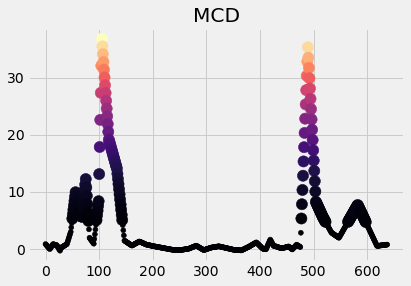

Text(0.5, 1.0, 'IQRHM')

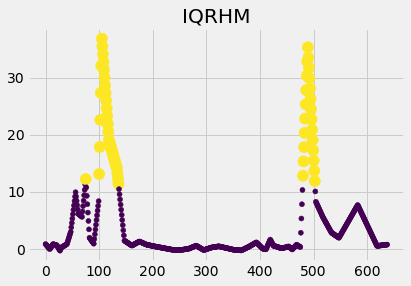

In [63]:
# Clear the figure
plt.clf()
%matplotlib inline

# For a random RepID, plot the N2OFlux as a scatterplot for each outlier detection method using the scores as the color
rep_id = np.random.choice(rep_ids)
flux = alldata[alldata['RepID'] == rep_id]['N2OFlux'].values.tolist()
mcd_pred = alldata[alldata['RepID'] == rep_id]['MCD'].values.tolist()
exp_day = np.arange(len(flux))

# Multiply by 100 and add 25 to all mcd_pred values to make them visible
mcd_pred_graph = [x*100+25 for x in mcd_pred]

# MCD
mcd_scores = alldata[alldata['RepID'] == rep_id][['MCD_scores']].values.tolist()
plt.style.use('fivethirtyeight')
plt.size = (15,15)
plt.scatter(exp_day, flux, c=mcd_scores, cmap='magma', s=mcd_pred_graph)
plt.title('MCD')
plt.show()
plt.clf()

# IQR
iqrhm = alldata[alldata['RepID'] == rep_id]['IQRHM'].values.tolist()
iqrhm_size = [x*100+25 for x in iqrhm]

plt.style.use('fivethirtyeight')
plt.size = (15,15)
plt.scatter(exp_day, flux, c=iqrhm, s=iqrhm_size)
plt.title('IQRHM')

In [30]:
# Calculate the false poitive and false negative rates for each outlier detection method
mcd_pred = alldata['MCD'].values.tolist()
iqrhm = alldata['IQRHM'].values.tolist()
true = alldata['HMTruth'].values.tolist()
print("MCD FP:", sum(1 for x,y in zip(mcd_pred,true) if x == 1 and y == 0) / sum(1 for x in mcd_pred if x == 1))
print("MCD FN:", sum(1 for x,y in zip(mcd_pred,true) if x == 0 and y == 1) / sum(1 for x in mcd_pred if x == 0))
print("IQRHM FP:", sum(1 for x,y in zip(iqrhm,true) if x == 1 and y == 0) / sum(1 for x in iqrhm if x == 1))
print("IQRHM FN:", sum(1 for x,y in zip(iqrhm,true) if x == 0 and y == 1) / sum(1 for x in iqrhm if x == 0))

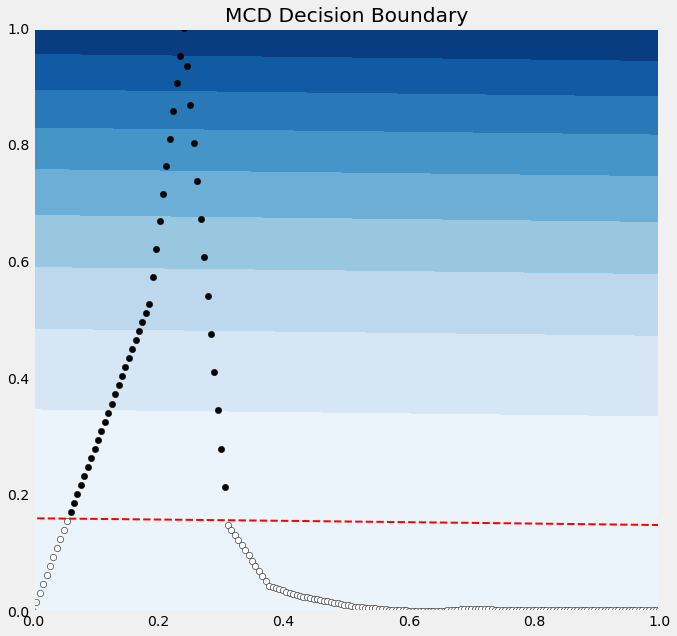

In [67]:
# Create a decision boundary graph using the mcd_score for the MCD method (most accurate)
rep_ids = alldata['RepID'].unique()
rep_id = np.random.choice(rep_ids)
mcd_pred = alldata[alldata['RepID'] == rep_id]['MCD'].values.tolist()
mcd_scores = alldata[alldata['RepID'] == rep_id][['MCD_scores']].values.tolist()

flux = alldata[alldata['RepID'] == rep_id][['N2OFlux']]
# Add column to flux dataframe counting upward from 0
flux['index'] = np.arange(len(flux))

# Scale flux and mcd_scores to be between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler()
# Fit transform the flux dataframe, convert to pandas dataframe
fluxdf_scaled = pd.DataFrame(scaler.fit_transform(flux), columns=flux.columns)
flux_scaled = fluxdf_scaled['N2OFlux'].values.tolist()
exp_day_scaled = fluxdf_scaled['index'].values.tolist()
mcd_scores_scaled = scaler.fit_transform(np.array(mcd_scores).reshape(-1,1))

# Create dataframe of scaled values
dfscaled = pd.DataFrame({'flux':flux_scaled, 'mcd_scores':mcd_scores_scaled.flatten(), 'exp_day':exp_day_scaled, 'mcd_pred':mcd_pred})
# Create df from just exp_day and flux columns
fit_df = dfscaled[['exp_day', 'flux']]

# Fit MCD model to scaled data
mcd_scaled = MCD(contamination=0.25)
mcd_scaled.fit(fluxdf_scaled)
scores_pred = mcd_scaled.decision_function(fluxdf_scaled) * -1

xx , yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
n_inliers = len(mcd_pred) - np.count_nonzero(mcd_pred)
n_outliers = np.sum(mcd_pred)
outliers_fraction = n_outliers / (n_inliers + n_outliers)
# Set threshold equal to the minimum mcd_scores value where the mcd_pred is 1 in the dfscaled dataframe
threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)

# fill blue map colormap from minimum anomaly score to threshold value
plt.figure(figsize=(10, 10))
Z = mcd_scaled.decision_function(np.c_[yy.ravel(), xx.ravel()]) * -1
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 10),cmap=plt.cm.Blues_r)

# IX1 - inlier feature 1,  IX2 - inlier feature 2
IX1 =  np.array(dfscaled['exp_day'][dfscaled['mcd_pred'] == 0]).reshape(-1,1)
IX2 =  np.array(dfscaled['flux'][dfscaled['mcd_pred'] == 0]).reshape(-1,1)
# OX1 - outlier feature 1, OX2 - outlier feature 2
OX1 =  dfscaled['exp_day'][dfscaled['mcd_pred'] == 1].values.reshape(-1,1)
OX2 =  dfscaled['flux'][dfscaled['mcd_pred'] == 1].values.reshape(-1,1)

# draw red contour line where anomaly score is equal to threshold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
#plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

b = plt.scatter(IX1,IX2, c='white',s=40, edgecolor='k')

c = plt.scatter(OX1,OX2, c='black',s=40, edgecolor='k')

plt.axis('tight')

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title("MCD Decision Boundary")
plt.show()

In [29]:
print(threshold)
print(Z)
print(len(Z[0]))

0.04846517276894745
[[  -8.20239678   -8.08565912   -7.97004494 ...   -6.89481177
    -6.99939792   -7.10510755]
 [  -7.87977781   -7.76443835   -7.65022236 ...   -6.84763647
    -6.95362082   -7.06072863]
 [  -7.56681903   -7.45287776   -7.34005996 ...   -6.81012136
    -6.91750389   -7.0260099 ]
 ...
 [-131.14601378 -131.30471979 -131.46454928 ... -184.10083128
  -184.4808611  -184.86201439]
 [-132.72645148 -132.88655569 -133.04778336 ... -185.95671265
  -186.33814066 -186.72069214]
 [-134.31654937 -134.47805177 -134.64067764 ... -187.82225421
  -188.20508041 -188.58903008]]
200


In [24]:
print(threshold)
print(mcd_scores_scaled)

0.009734056663900004
[[1.00000000e+00]
 [9.76308508e-01]
 [9.52897472e-01]
 [9.29774069e-01]
 [9.06934687e-01]
 [8.84375892e-01]
 [8.62104598e-01]
 [8.40113978e-01]
 [8.18410772e-01]
 [7.96988327e-01]
 [7.75853209e-01]
 [7.54998939e-01]
 [7.34431909e-01]
 [6.42505976e-01]
 [5.56734450e-01]
 [4.77119854e-01]
 [4.03656940e-01]
 [3.36348433e-01]
 [2.75194334e-01]
 [2.20194642e-01]
 [1.71349358e-01]
 [1.28659785e-01]
 [9.21231126e-02]
 [7.50446446e-02]
 [5.97356947e-02]
 [4.61962628e-02]
 [3.44263491e-02]
 [2.44259535e-02]
 [1.61950760e-02]
 [9.73405666e-03]
 [5.04210652e-03]
 [2.11967447e-03]
 [9.66760512e-04]
 [1.58336465e-03]
 [1.50138501e-03]
 [1.42157512e-03]
 [1.34393499e-03]
 [1.26846461e-03]
 [1.19524529e-03]
 [1.12411167e-03]
 [1.05514779e-03]
 [9.88353672e-04]
 [9.23729305e-04]
 [8.80731594e-04]
 [8.38880289e-04]
 [7.98175390e-04]
 [7.58616897e-04]
 [7.20138758e-04]
 [6.82873928e-04]
 [6.46755505e-04]
 [6.11783488e-04]
 [5.77957877e-04]
 [5.45278672e-04]
 [5.13745873e-04]
 [3.674

In [30]:
print(np.c_[yy.ravel(), xx.ravel()])

[[0.         0.        ]
 [0.         0.00502513]
 [0.         0.01005025]
 ...
 [1.         0.98994975]
 [1.         0.99497487]
 [1.         1.        ]]


In [17]:
# Calculate ROC curve and AUC for each outlier detection method

# MCD
fpr, tpr, _ = metrics.roc_curve(true,  mcd_pred)
plt.plot(fpr,tpr, label="MCD")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
auc = metrics.roc_auc_score(true, mcd_pred)
print("MCD AUC:", auc)

# IQRHM
fpr, tpr, _ = metrics.roc_curve(true,  iqrhm)
plt.plot(fpr,tpr, label="IQRHM")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
auc = metrics.roc_auc_score(true, iqrhm)
print("IQRHM AUC:", auc)

In [20]:
# Calculate AUC for each outlier detection method
print("MCD AUC:", metrics.roc_auc_score(true, mcd_pred))
print("IQRHM AUC:", metrics.roc_auc_score(true, iqrhm))
print("LOF AUC:", metrics.roc_auc_score(true, lof_pred))
print("KNN AUC:", metrics.roc_auc_score(true, knn_pred))
print("IForest AUC:", metrics.roc_auc_score(true, iforest_pred))
print("PCA AUC:", metrics.roc_auc_score(true, pca_pred))
print("ABOD AUC:", metrics.roc_auc_score(true, abod_pred))

# Unzip the FB, XGBOD, and LUNAR tuples
fb_pred, true_fb = zip(*fb_list)
xgbod_pred, true_xb = zip(*xb_list)
lunar_pred, true_lunar = zip(*lunar_list)
print("FB AUC:", metrics.roc_auc_score(true_fb, fb_pred))
print("XGBOD AUC:", metrics.roc_auc_score(true_xb, xgbod_pred))
print("LUNAR AUC:", metrics.roc_auc_score(true_lunar, lunar_pred))